Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
# First lets only use numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)

In [3]:
# Libraries for plotting
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [4]:
# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [5]:
# Part 1: Training and Testing
# place the target data price in a separate dataframe y
y_data = df['price']

# drop price data in x data
x_data=df.drop('price',axis=1)

# randomly split our data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


Question 1:
Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. 
The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1".

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [7]:
# import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression

# create a Linear Regression object
lre=LinearRegression()

# fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

# Calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [8]:
# Calculate the R^2 on the train data
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

Question 2: Find the R^2 on the test data using 90% of the data for training data

In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7340722810055448

Cross-validation Score

In [10]:
# import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score

# input the object, the feature in this case ' horsepower', the target data (y_data). 
# The parameter 'cv' determines the number of folds; in this case 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

# default scoring is R^2; each element in the array has the average R^2 value in the fold
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [11]:
# calculate the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [12]:
# use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

Question 3: Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature

In [13]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [14]:
from sklearn.model_selection import cross_val_predict

# input the object, the feature in this case 'horsepower' , the target data y_data. 
# The parameter 'cv' determines the number of folds; in this case 4
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

Part 2: Overfitting, Underfitting and Model Selection

In [15]:
# create Multiple linear regression objects 
# and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [17]:
# Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [18]:
# perform some model evaluation using our training and testing data separately. 
# import the seaborn and matplotlibb library for plotting.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

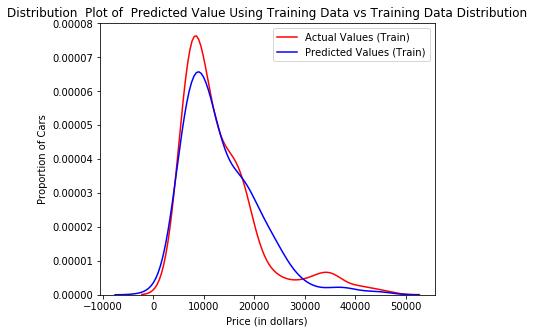

In [19]:
# examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

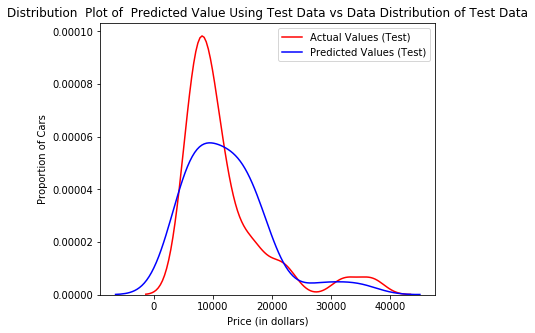

In [20]:
# Plot of predicted value using the test data compared to the test data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [21]:
# see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset
from sklearn.preprocessing import PolynomialFeatures

# use 55 percent of the data for testing and the rest for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

# perform a degree 5 polynomial transformation on the feature 'horse power'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [22]:
# create a linear regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

# yhat = poly.predict(x_test_pr)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [23]:
# take the first five predicted values and compare it to the actual targets
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [14141.63807508 14141.63807508 20814.29423473 12745.03562306]
True values: [ 6295. 10698. 13860. 13499.]


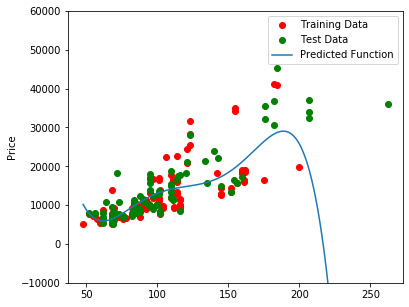

In [24]:
# use the function "PollyPlot" that defined at the beginning of the lab 
# to display the training data, testing data, and the predicted function.
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [25]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902635091

In [26]:
# R^2 of the test data
poly.score(x_test_pr, y_test)

-29.87141885918752

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. 

The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

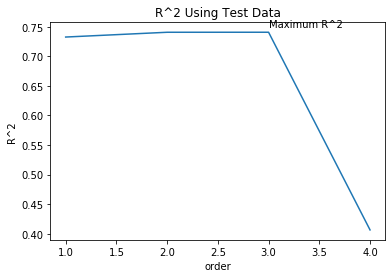

In [27]:
# see how the R^2 changes on the test data for different order polynomials and plot the results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

The following function will be used in the next section

In [28]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [29]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [30]:
# can perform polynomial transformations with more than one feature 
# create a "PolynomialFeatures" object "pr1" of degree two
pr1=PolynomialFeatures(degree=2)

# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'
x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# How many dimensions does the new feature have?
x_train_pr1.shape

(110, 70)

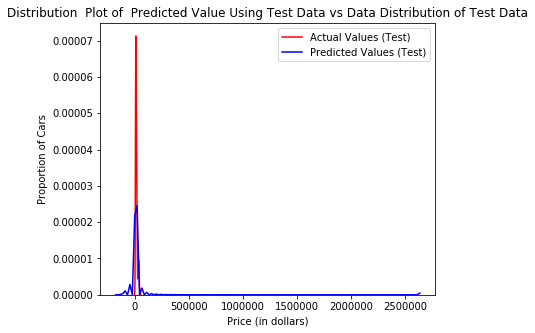

In [31]:
# Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features

poly1=lre.fit(x_train_pr1,y_train)

# Use the method "predict" to predict an output on the polynomial features, 
# then use the function "DistributionPlot" to display the distribution of the predicted output vs the test data
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is lower than actual value for cars where the price $10,000 range, 

conversely the predicted price is larger than the price cost in the $30,000~40,000 range. 

As such the model is not as accurate in these ranges .

Part 3: Ridge regression

In [32]:
# perform a degree two polynomial transformation on our data
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [33]:
# import Ridge from the module linear models
from sklearn.linear_model import Ridge

# create a Ridge regression object, setting the regularization parameter to 0.1
RidgeModel=Ridge(alpha=0.1)

#  fit the model using the method fit
RidgeModel.fit(x_train_pr, y_train)

# obtain a prediction
yhat = RidgeModel.predict(x_test_pr)

# compare the first five predicted samples to our test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


C:\Users\KL Goh\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


In [34]:
# select the value of Alfa that minimizes the test error, for example, we can use a for loop
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

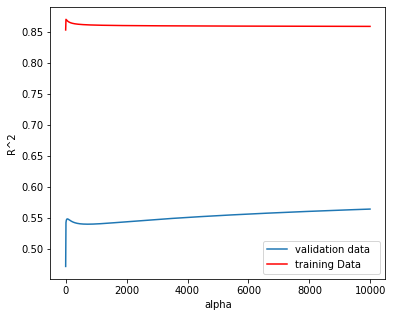

In [35]:
# plot out the value of R^2 for different Alphas
width = 6
height = 5
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Question 5: 

Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. 

The parameter alpha should be set to 10.

In [36]:
RidgeModel = Ridge(alpha=0) 
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.4709833260694387

Part 4: Grid Search

In [37]:
# import GridSearchCV from the module model_selection
from sklearn.model_selection import GridSearchCV

In [38]:
# create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [39]:
# Create a ridge regions object
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

# obtain the estimator with the best parameters and assign it to the variable BestRR as follows
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
# test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

Question 6: 
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

In [42]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)